In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:,2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
308,36,125000,1
213,35,58000,0
154,40,47000,0
114,42,80000,0
189,28,32000,0


In [6]:
from sklearn.model_selection import train_test_split
y = df['Purchased']
X = df.drop('Purchased',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [8]:
X_train.shape,X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
# We learn the data from train set, but transform the data from both train and test
# transform train and test sets
X_train_scaled = scaler.transform(X_train)  # returns numpy Array and takes input as dataframe
X_test_scaled = scaler.transform(X_test)

In [11]:
scaler.mean_

array([3.70928571e+01, 7.13571429e+04])

In [13]:
# converting numpy array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [14]:
np.round(X_train.describe(),1)  # Original data - before scaled data

,Age,EstimatedSalary
count,280.0,280.0
mean,37.1,71357.1
std,10.5,34731.4
min,18.0,15000.0
25%,29.0,46500.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


### StandardScaler - After Standard scaler Mean becomes Zero and SD becomes one

In [15]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.8,-1.6
25%,-0.8,-0.7
50%,-0.0,-0.0
75%,0.8,0.5
max,2.2,2.3


#### Effect Of Scaling

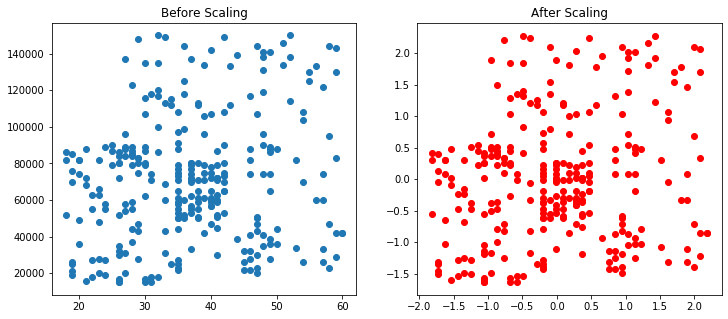

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

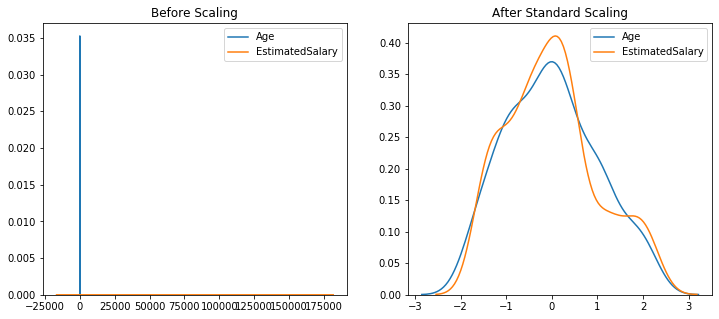

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

#### Comparision Of Distribution

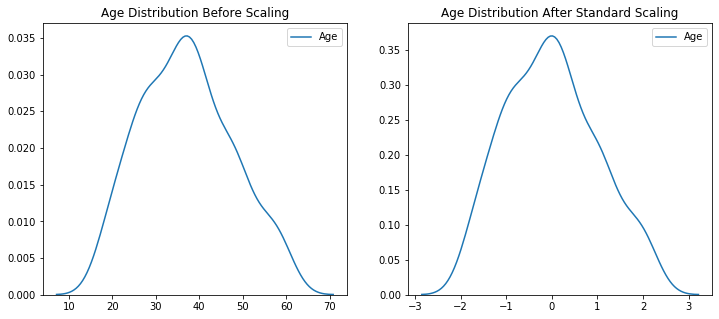

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

#### Why scaling is important?

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [21]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

/Users/hadoop/tools/Anaconda3/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hadoop/tools/Anaconda3/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [26]:
from sklearn.metrics import accuracy_score

In [28]:
print("Actual, accuracy_score:",accuracy_score(y_test,y_pred))
print("Scaled, accuracy_score:",accuracy_score(y_test,y_pred_scaled))

Actual, accuracy_score: 0.6
Scaled, accuracy_score: 0.8166666666666667


We can see big difference in accuracy score between scaled and non-scaled

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [33]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
y_pred_dt = dt.predict(X_test)
y_pred_scaled_dt = dt_scaled.predict(X_test_scaled)

In [35]:
print("Actual, accuracy_score:",accuracy_score(y_test,y_pred_dt))
print("Scaled, accuracy_score:",accuracy_score(y_test,y_pred_scaled_dt))

Actual, accuracy_score: 0.875
Scaled, accuracy_score: 0.8666666666666667


### No Need to scale for the Decision Tree type models

In [36]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


#### Effect of Outtliers

#### Scalling as no impact on the Outtliers